# Exploring Houses in the Seatle Area

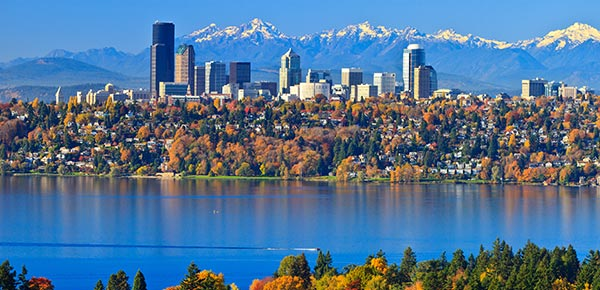

**Authors:** Lenore, Seraj, Carlos
***

## Overview

Jelly's Angels takes on housing! We sift through the data to see what we find in the Seattle Housing Market. We start by importing neccassary packeges, cleaning the data and sticking to the significant variables to help us understand the market. We want to know what home features we would like to help our stakeholders get a better overall average price for homes sold. Some of our recomendations include, home rennovations, more square living space and a sticking to newer homes. 
***

# Business Understanding

Our Stakeholder are Real Estate agencies in King County, Washington. The year is 2016. Real Estate agencies want to stand out in the competitive Seattle Housing Market and learn what factors for homes lead to better than average sale prices to focus their listing efforts on those homes.

In the following project, we take a look at the King County House Data and find a linear regression model that allows us to make inferences on what factors will lead to a house selling for above the average home price.
***

## Data Understanding

Our data is from King County housing in Washington and spans home sales between 2014 and 2015 from kaggle, with 21 variables and 21597 rows. When choosing what data is relevant to our stakeholders, we take the information we learned from the data exploration above combined with our stakeholders’ needs - to make inferences on what factors can lead to higher-than-average sales prices of homes. We only stick to the relevant variables that help us explain to our shareholders in a non-technical sense what housing features to focus on to increase housing prices in their area. 
***

* Import necessary packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.preprocessing import OrdinalEncoder
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [2]:
#importing the dataset as df
df = pd.read_csv('data/kc_house_data.csv')

# Data Exploration

In [3]:
# Start exploring the data.
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
# Take a look at an overview of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# See what values are none existant. 
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

- mostly complete data set! Some nulls in yr_rennovated, might have to take care of those if we determine this is relevant

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


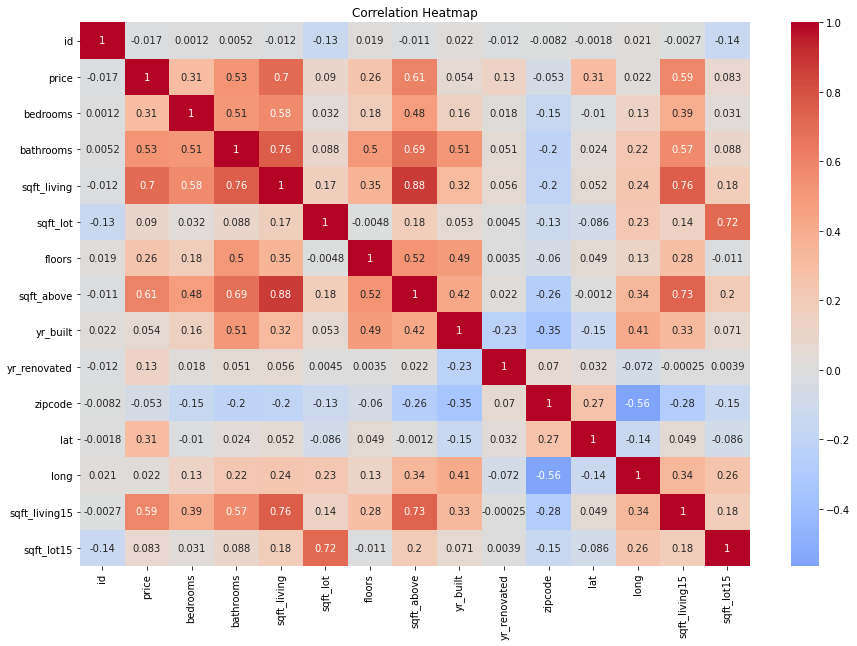

In [7]:
# Plot heatmap and look at correlations
corr = df.corr()

plt.figure(figsize = (15,10))

sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')

plt.title('Correlation Heatmap')

plt.show();

#plt.savefig('Heatmap')

# Observations: 
Collineraity is when one feature variable in a regression model is highly linearly correlated with another feature variable. there are collinearity between: 
1) [sqft_living] and ['sqft_above','bathrooms','sqft_living15'] correlation
2) [sqft_lot] and [sqft_lot_15] correlation
3) [sqft_above] and [bathrooms] correlation
Based on this we may choose to drop sqft_living15, sqft_above and sqft_lot15

* Based on the initial exploration above we can see that the following variables are highly correlated with each other (>.7) indicating multicollinearity

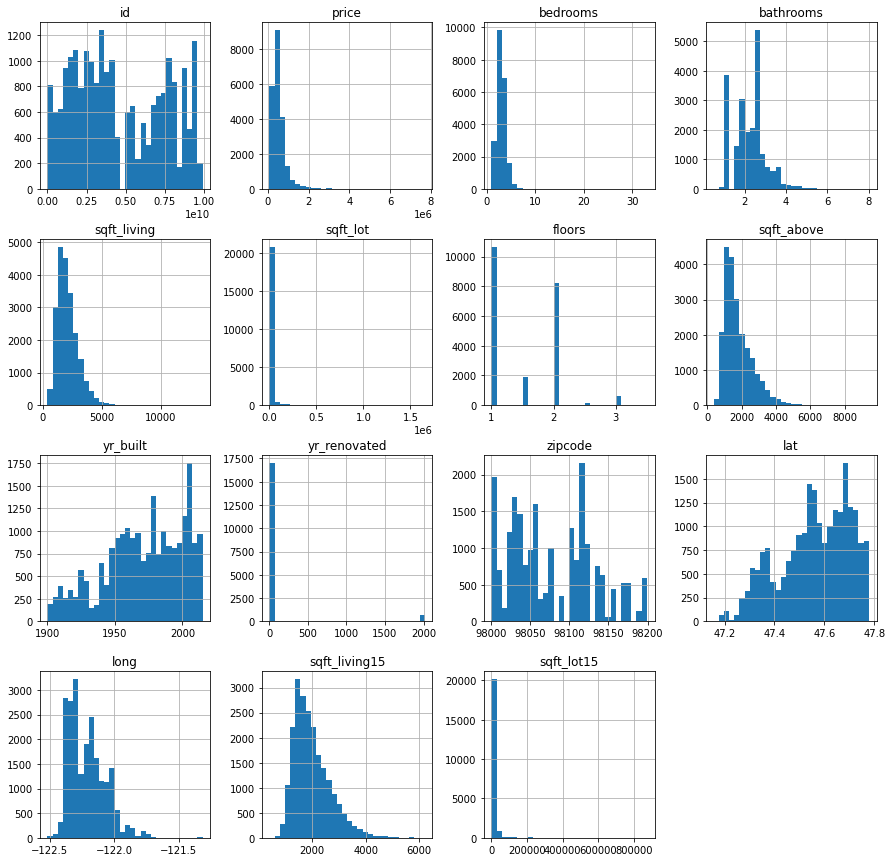

In [8]:
# Check distributions of our variables, see the catagorical variables. 
df.hist(figsize  = [15, 15],bins=30) 

plt.show();

#plt.savefig('histcol')

In [9]:
# Exploring what variables are most correlated with price. 
salecorr = df.corr()['price'].sort_values(ascending=False)

salecorr

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

* We see that sqft_living, sqft_above, and sqft_living15 are the most correlated variables. We will look further into these variables to see if there are any multicollinearity issues and decide whether to keep or drop them for a more accurate model. 

# Training Data

* Splitting data into our "training" set and "testing" set. The training set is 75% of the data and the testing set is 25% per default train_test_split()

In [10]:
y = df["price"]

X = df.drop("price", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
X_train.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6405,3905080280,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,Average,8 Good,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114
937,5466420030,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,Average,7 Average,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151
19076,2623069010,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,Very Good,9 Better,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542
15201,4443800545,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,Good,7 Average,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880
13083,9485930120,10/14/2014,3,2.25,2270,32112,1.0,NO,NONE,Good,8 Good,1740,530.0,1980,0.0,98042,47.3451,-122.094,2310,41606


# Cleaning Data

## Choosing data to drop
**Location**
Latitude and longitude are specific points on a map and all unique, making predictions difficult to base off these variables. We have zip code data that will better serve for location for our modeling. This is why we’re dropping `lat` and `long`. Zip Codes refer to postal routes and oftentimes don’t correlate well with defined neighborhoods. Our clients are also working with the entire King County, so we chose to drop the `zipcodes` column.
**ID**
We are droping ID because it is a unique id for the home which we do not need for our modeling.
**Date:** this entire dataframe takes place in the course of just two years, to identify trends in sale price by time of year such as month we would need to see more than two year’s of data. Because of this we decided to drop `date`.
The following were highly correlated as noted above and we will be dropping them to avoid multicollinarity:
`sqft_living`, `sqft_above`, were highly correlated =.88, meaning we could run into issues with multicollinarity. We’re going to keep them right now since they tell us different aspects of the home and could help the accuracy of the model

In [12]:
# Identify numerical variables. 
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])

X_train_non_numeric = X_train.select_dtypes(exclude=['int64', 'float64'])

print(X_train_non_numeric.columns)
print(X_train_numeric.columns)

Index(['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement'], dtype='object')
Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


# Exploring categorical variables

In [13]:
#change rennovated into just a 'yes, no': 
X_train.yr_renovated.value_counts()

0.0       12771
2014.0       49
2005.0       24
2003.0       23
2013.0       23
          ...  
1959.0        1
1944.0        1
1956.0        1
1951.0        1
1950.0        1
Name: yr_renovated, Length: 66, dtype: int64

In [14]:
# Converting yr_renovated to usable integers
X_train['yr_renovated'] = X_train['yr_renovated'].fillna(0)

X_train['is_rennovated'] = X_train['yr_renovated'].map(lambda x: 1 if x > 0 else 0)

X_train['is_rennovated'].value_counts()

X_train = X_train.drop(['yr_renovated'], axis=1)

X_train.is_rennovated.value_counts()

0    15650
1      547
Name: is_rennovated, dtype: int64

In [15]:
# Convertering Waterfront to usuable integers
X_train['waterfront'] = X_train.waterfront.fillna('N/A')

waterfront_or = X_train.loc[:, ['waterfront']]

encoder_water = OrdinalEncoder()

encoder_water.fit(waterfront_or)

encoder_water.categories_[0]

water_trans = encoder_water.transform(waterfront_or)

water_trans = water_trans.flatten()

X_train['waterfront'] = water_trans

In [16]:
X_train.waterfront.value_counts()

1.0    14330
0.0     1756
2.0      111
Name: waterfront, dtype: int64

In [17]:
X_train.drop(columns='waterfront', inplace=True)

Since only .0067% of the houses are waterfront, it would not be a good variable so we dropped waterfront. 

In [18]:
# Converting view to ussable integers.
X_train["view"] = X_train["view"].fillna("N/A")

view = X_train[["view"]]

ohe = OneHotEncoder(categories="auto",sparse=False,handle_unknown="ignore")

ohe.fit(view)

view_trans = ohe.transform(view)

view_trans1= pd.DataFrame(view_trans, columns=ohe.categories_[0],index=X_train.index)

In [19]:
X_train.view.value_counts()

NONE         14585
AVERAGE        695
GOOD           378
EXCELLENT      245
FAIR           245
N/A             49
Name: view, dtype: int64

In [20]:
X_train.drop(columns='view', inplace=True)

* We are dropping "view" column since 67% of the values are none, it would not be a  variable.

In [21]:
X_train = X_train.drop(columns=['lat', 'long','id', 'date'])

Latitude and longitude are specific points on a map and all unique, making predictions difficult to base off these variables. We have zip code data that will better serve for location for our modeling. This is why we’re dropping lat and long. We are droping ID because it is a unique id for the home which we do not need for our modeling. Dropping date: our stakeholders are looking for what home factors lead to better than average sale prices for them to choose to list.

In [22]:
# Training variable to see if it will be useful in our model. 
condition = X_train[["condition"]]

ohe = OneHotEncoder(categories="auto",sparse=False,handle_unknown="ignore")

ohe.fit(condition)

condition_trans = ohe.transform(condition)

condition_trans1= pd.DataFrame(condition_trans, columns=ohe.categories_[0],index=X_train.index)

condition_trans1

X_train.drop("condition", axis=1, inplace=True)

X_train = pd.concat([X_train, condition_trans1], axis=1)

X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,is_rennovated,Average,Fair,Good,Poor,Very Good
6405,3,2.50,1880,4499,2.0,8 Good,1880,0.0,1993,98029,2130,5114,0,1.0,0.0,0.0,0.0,0.0
937,3,2.50,2020,6564,1.0,7 Average,1310,710.0,1994,98042,1710,5151,0,1.0,0.0,0.0,0.0,0.0
19076,5,4.00,4720,493534,2.0,9 Better,3960,760.0,1975,98027,2160,219542,0,0.0,0.0,0.0,0.0,1.0
15201,2,2.00,1430,3880,1.0,7 Average,1430,0.0,1949,98117,1430,3880,0,0.0,0.0,1.0,0.0,0.0
13083,3,2.25,2270,32112,1.0,8 Good,1740,530.0,1980,98042,2310,41606,0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2.0,7 Average,2230,0.0,2004,98065,2230,6088,0,1.0,0.0,0.0,0.0,0.0
21575,4,2.75,2770,3852,2.0,8 Good,2770,0.0,2014,98178,1810,5641,0,1.0,0.0,0.0,0.0,0.0
5390,4,1.50,1530,9000,1.0,6 Low Average,1530,0.0,1976,98014,1520,8500,0,0.0,0.0,1.0,0.0,0.0
860,1,0.75,380,15000,1.0,5 Fair,380,0.0,1963,98168,1170,15000,0,1.0,0.0,0.0,0.0,0.0


# Models

* Setting up a dummy regressor - this sets up a baseline to use to compare linear regression models we build going forward

In [23]:
dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(X_train, y_train)

dummy_regr.predict(X_train)

dummy_regr.score(X_train, y_train)

0.0

In [24]:
# Drop columns that are not relevant. 
X_model1 = X_train.drop(columns=['yr_built', 'sqft_lot','floors', "sqft_lot15", "is_rennovated",
                                            'bedrooms','sqft_basement','Average','Fair','Poor',
                                           'sqft_living15', "sqft_above",'Very Good','bathrooms', 'grade', 'zipcode', 'Good'])

In [25]:
# Scale our variables.
X_train_scaled1 = (X_model1 - np.mean(X_model1)) / np.std(X_model1)

In [26]:
#This is JUST SQFT_LIVING and Price. 
X_int = sm.add_constant(X_train_scaled1)
mod1 = sm.OLS(y_train, X_int).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:51:48   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.413e+05   2054.634    263.446      0.000    5.37e+05    5.45e+05
sqft_living  2.566e+05   2054.634    124.878      0.000    2.53e+05    2.61e+05
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Adding a couple relevant variables to our model

In [27]:
# Drop columns that are not relevant. 
X_model2 = X_train.drop(columns=['sqft_lot','floors',
                                            'sqft_basement','Average','Fair','Poor',
                                           'sqft_lot15','sqft_above','Very Good', 'grade', 'zipcode', 'Good', 'sqft_living15'])

In [28]:
# Scale our variables.
X_model_scaled2 = (X_model2 - np.mean(X_model2)) / np.std(X_model2)

In [29]:
X_int = sm.add_constant(X_model_scaled2)
mod2 = sm.OLS(y_train, X_int).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     3992.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:51:49   Log-Likelihood:            -2.2398e+05
No. Observations:               16197   AIC:                         4.480e+05
Df Residuals:                   16191   BIC:                         4.480e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.413e+05   1926.729    280.934      0.000    5.38e+05    5.45e+05
bedrooms      -6.608e+04   2441.474    -27.066      0.000   -7.09e+04   -6.13e+04
bathrooms      6.505e+04   3354.931     19.390      0.000    5.85e+04    7.16e+04
sqft_living    2.742e+05   3167.293     86.587      0.000    2.68e+05     2.8e+05
yr_built       -8.95e+04   2336.814    -38.299      0.000   -9.41e+04   -8.49e+04
is_rennovated  9117.8016   2002.128      4.554      0.000    5193.408     1.3e+04
==============================================================================
Omnibus:                     9838.611   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           260515.213
Skew:                           2.455   Prob(JB):                         0.00
Kurtosis:                      22.024   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Took away bedrooms, year built becuase of the negative coefficients, we want possitive coefficients for our models. 

In [30]:
# Drop columns that are not relevant. 
X_model3 = X_train.drop(columns=['sqft_lot','floors',
                                            'sqft_basement','Average','Fair','Poor',
                                           'sqft_living15','sqft_lot15','sqft_above','Very Good', 'bedrooms', 'grade', 'zipcode', 'Good', 'yr_built'])

In [31]:
# Scale our variables.
X_model_scaled3 = (X_model3 - np.mean(X_model3)) / np.std(X_model3)

In [32]:
# Fit and get model summary.
X_int = sm.add_constant(X_model_scaled3)
mod3 = sm.OLS(y_train, X_int).fit()
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     5342.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:51:49   Log-Likelihood:            -2.2492e+05
No. Observations:               16197   AIC:                         4.498e+05
Df Residuals:                   16193   BIC:                         4.499e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.413e+05   2040.869    265.223      0.000    5.37e+05    5.45e+05
bathrooms     -2885.7527   3137.689     -0.920      0.358   -9035.971    3264.465
sqft_living    2.573e+05   3136.893     82.027      0.000    2.51e+05    2.63e+05
is_rennovated  3.038e+04   2043.898     14.863      0.000    2.64e+04    3.44e+04
==============================================================================
Omnibus:                    10368.869   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           285304.636
Skew:                           2.638   Prob(JB):                         0.00
Kurtosis:                      22.872   Cond. No.                         2.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

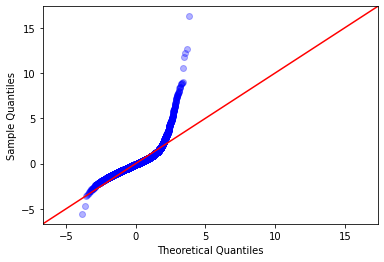

In [33]:
# QQ-plot of residuals
residuals = mod3.resid

fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)

fig.show()

#plt.savefig('qqtest')

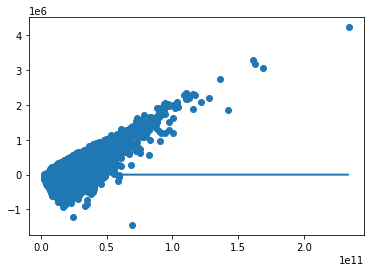

In [34]:
# Combine our training data sets to run tests. 
# Check for homoscedasticity
train_df = pd.concat([X_model_scaled3, y_train], axis=1)

plt.scatter(mod3.predict(train_df), mod3.resid)

plt.plot(mod3.predict(train_df), [0 for i in range(len(train_df))])

#plt.savefig('homtest');

In [35]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_model_scaled3, y_train)

train_preds = lr.predict(X_model_scaled3)

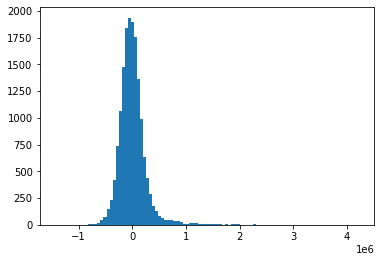

In [36]:
# Test for normality. 
train_residuals = y_train - train_preds

plt.hist(train_residuals, bins=100)

#plt.savefig('normtest')

plt.show()

* Find any out any outlires in our dataset that may be having a effect on our models. 

In [37]:
for i in range(90, 99):
    q = i / 100
    print('{} percentile: {}'.format(q, y_train.quantile(q=q)))

0.9 percentile: 887349.9999999999
0.91 percentile: 919993.6
0.92 percentile: 951000.0
0.93 percentile: 998000.0
0.94 percentile: 1070000.0
0.95 percentile: 1160000.0
0.96 percentile: 1270000.0
0.97 percentile: 1400000.0
0.98 percentile: 1610000.0


In [38]:
# Recombine our data sets to drop outliers. 
train_df = X_train.join(y_train)

In [39]:
# Isolating the outliers in the top .02%
train_df[train_df['price'] > 1610000].value_counts().sum()

319

In [40]:
#Dropping outliers
train_df = train_df.drop(train_df[train_df.price > 1610000].index)

In [41]:
# Reestablishing our training data sets. 
y_train = train_df['price']
X_train = train_df.drop(columns='price')

* Plot a hist plot to show average sale price.

No handles with labels found to put in legend.


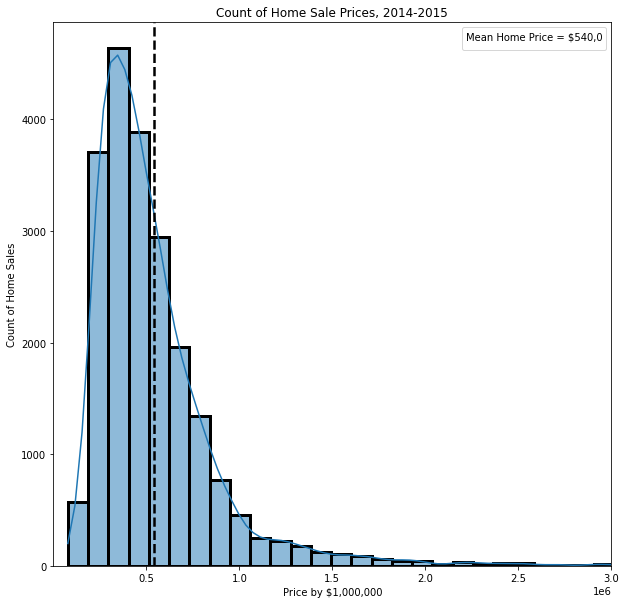

In [53]:
histplot, ax = plt.subplots(figsize = (10,10))

ax.set_title("Count of Home Sale Prices, 2014-2015")

ax.set_xlabel('Price by $1,000,000')

ax.set_ylabel('Count of Home Sales')

ax.set_label

sns.histplot(data=df, x="price", fill=True, kde=True, bins=70, lw=3)

ax.set_xlim(left=100, right=3000000)

ax.axvline(x=df['price'].mean(), c='k', ls='--', lw=2.5)

ax.legend(title='Mean Home Price = $540,0')

#plt.savefig('avgprice')

# Final model and testing models

In [43]:
# Drop columns that are not relevant. 
X_model4 = X_train.drop(columns=['sqft_lot','floors',
                                            'yr_built','sqft_basement','Average','Fair','Poor',
                                           'sqft_living15','sqft_lot15','sqft_above','Very Good', 'bedrooms', 'grade', 'zipcode', 'Good'])

In [45]:
# Scale our variables.
X_model_scaled4 = (X_model4 - np.mean(X_model4)) / np.std(X_model4)

In [46]:
# Fit and get model summary
X_int = sm.add_constant(X_model_scaled4)
mod4 = sm.OLS(y_train, X_int).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     4299.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:52:48   Log-Likelihood:            -2.1569e+05
No. Observations:               15878   AIC:                         4.314e+05
Df Residuals:                   15874   BIC:                         4.314e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.069e+05   1523.565    332.737      0.000    5.04e+05     5.1e+05
bathrooms      2657.3190   2254.059      1.179      0.238   -1760.893    7075.531
sqft_living    1.689e+05   2253.287     74.967      0.000    1.65e+05    1.73e+05
is_rennovated  2.216e+04   1524.869     14.534      0.000    1.92e+04    2.52e+04
==============================================================================
Omnibus:                     2602.217   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5575.470
Skew:                           0.972   Prob(JB):                         0.00
Kurtosis:                       5.156   Cond. No.                         2.57
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Running a model NOT scaled. 

In [47]:
X_int = sm.add_constant(X_model4)
mod4 = sm.OLS(y_train, X_int).fit()
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     4299.
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        08:52:49   Log-Likelihood:            -2.1569e+05
No. Observations:               15878   AIC:                         4.314e+05
Df Residuals:                   15874   BIC:                         4.314e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.487e+04   4655.292     18.231      0.000    7.57e+04     9.4e+04
bathrooms      3621.5527   3071.967      1.179      0.238   -2399.850    9642.956
sqft_living     201.7510      2.691     74.967      0.000     196.476     207.026
is_rennovated  1.257e+05   8648.377     14.534      0.000    1.09e+05    1.43e+05
==============================================================================
Omnibus:                     2602.217   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5575.470
Skew:                           0.972   Prob(JB):                         0.00
Kurtosis:                       5.156   Cond. No.                     1.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Run test again for our final model. 

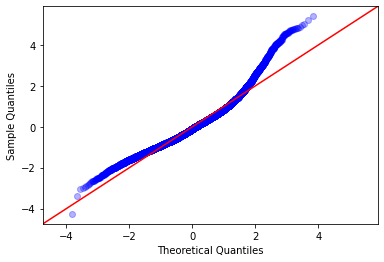

In [48]:
# QQ-plot of residuals
residuals = mod4.resid

fig = sm.graphics.qqplot(residuals, dist=stats.norm, alpha = 0.3, line='45', fit=True)

fig.show()

#plt.savefig('qqplot2')

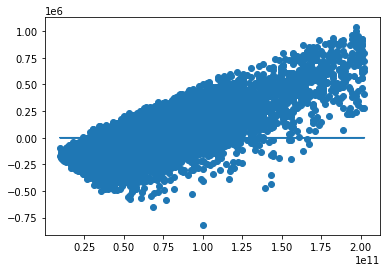

In [49]:
# Combine our training data sets to run tests. 
# Check for homoscedasticity
train_df = pd.concat([X_model_scaled4, y_train], axis=1)

plt.scatter(mod4.predict(train_df), mod4.resid)

plt.plot(mod4.predict(train_df), [0 for i in range(len(train_df))]);

#plt.savefig('homtest2')

In [50]:
# Linear regression to run a normality test. 

lr = LinearRegression()

lr.fit(X_model_scaled4, y_train)

train_preds = lr.predict(X_model_scaled4)

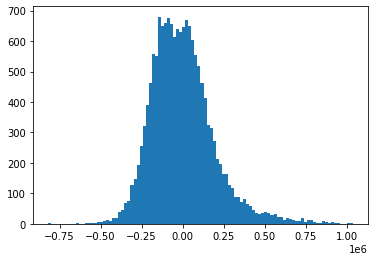

In [51]:
# Test for normality. 
train_residuals = y_train - train_preds

plt.hist(train_residuals, bins=100)

#plt.savefig('normtest2')

plt.show()

* After taking out outliers, our R squared went down a little but we feel we have a more accurate model. 

## Evaluation

Our models give a more in depth insight on association between home variables and price. By systematicly running through these models we can more confidently make inferences on the data than just data visualattion alone. For sale our models explain 44% of sales price. If we had more data we would be more confident, but in the years in question we are fairly confident in our inferences to increase the price of a home. Most real estate buisnesses in the King County area can use our models to have a general idea of how to increase the price of homes effecintly that they want to sell. 
***


## Conclusions

Home rennovations are highly recommended from our models. Adding a bathroom or and more square living space can significantly increase the price of a home. For future reaserach more data is needed for not only location but surounding areas to see the impact on home prices. 

Future impovements to this project would potentialy incorporate specific real estate company constraints and needs into our analysis and modeling. Another improvment would be to add more years worth of data to see year to year trends, as well as incorporating recent county and city home regulations into modeling and future success predictions. 

***